<a href="https://colab.research.google.com/github/ddwolfer/100-nlp-papers/blob/master/Yolov4_darknet_chinese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一、事前準備


## 更改colab設定<br>
選擇編輯<br>
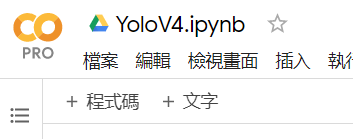

選擇筆記本設定<br>
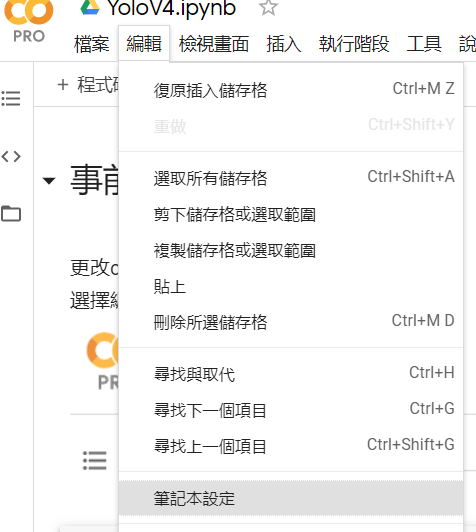

選擇使用GPU<br>
RAM可以看自己選擇<br>
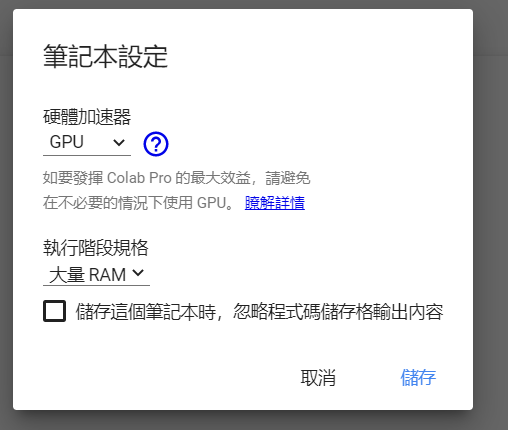

## 匯入自己的google雲端

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 從Yolo作者的github匯入程式碼

前三行是移動資料夾位置<br>
先移動到雲端內再下載(clone)<br>
請先確認自己的雲端至少有5G以上容量，這樣拿來訓練比較足夠<br>
如果你是學生的話<br>
去確認一下你的學校有沒有給你無限大google drive

In [1]:
import os
os.chdir('drive')
os.chdir('My Drive')
#!git clone https://github.com/AlexeyAB/darknet

**繼續移動資料夾**
移動到剛剛下載下來的資料夾內

In [2]:
os.chdir('darknet')

稍微看一下資料夾內有什麼

In [3]:
!ls

3rdparty		darknet_video.py       obj
backup			data		       __pycache__
backup-608		generate_test.py       rain.mp4
build			generate_train.py      README.md
build.ps1		image_yolov3.sh        result.avi
build.sh		image_yolov4.sh        result_rain.avi
cfg			IMG_1635.MOV	       results
chart.png		include		       scripts
chart_yolov-obj.png	json_mjpeg_streams.sh  src
cmake			libdarknet.a	       video_yolov3.sh
CMakeLists.txt		libdarknet.so	       video_yolov4.sh
darknet			LICENSE		       yolov4.conv.137
DarknetConfig.cmake.in	Makefile	       yolov-obj.cfg
darknet_images.py	net_cam_v3.sh
darknet.py		net_cam_v4.sh


# 二、如何訓練自己的資料集? 翻譯+整理自作者github

## step1 把自己的訓練資料匯入
YOLO需要的訓練資料集為 一張圖片配合一個TXT檔案，這兩個的檔名必須要一樣<br>
如: trainImg001.jpg, trainImg001.txt<br>
YOLO的TXT內格式大約如下<br>
注意一下這邊的XY是百分比<br>
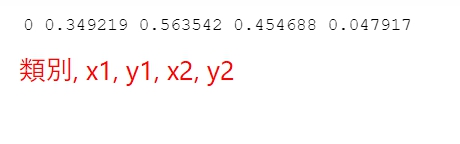

再來把你的好幾百張or千張圖片連同txt放到 darknet\data\obj <br>(如果是第一次，會沒有obj資料夾，自己創一個)  <br><br>
如果你的資料是用xml檔案當標籤(Faster RCNN用)，https://github.com/Isabek/XmlToTxt 可以用這個github的程式碼做轉換<br>
如果需要標籤工具請這邊下載: https://drive.google.com/file/d/1xxJXrmW67BIs7J2JJaItIPf6X2YxgeGW/view?usp=sharing<br>





## step2 設定需要的參數及檔案
這邊你需要製作的檔案有4個<br>
這些檔案剛下載下來的darknet裡面都沒有，要自己加<br><br>
**obj.data** : 設定有多少classes、.names檔案的位置、訓練資料的位置、各種位置
<br> 
**obj.names** : 設定所有的classes，第一行0,第二行1...以此類推，自己要記好
<br>
**yolov-obj.cfg** : 設定訓練的各種參數
<br>
**yolov4.conv.137** : model 
<br> <br>
obj.data、obj.names 放在 **darknet\data** <br>
yolov-obj.cfg 、yolov4.conv.137 放在 **darknet**<br>


### 第一個 obj.names
如果你有3個claases需要偵測，那obj.name裡面會長這樣:<br>
dog<br>
cat<br>
car<br>
依照自己有哪些東西要偵測去更改<br>
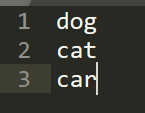
那這樣dog就是classes 0，cat是1，以此類推


### 第二個 obj.data
內容大致上長這樣<br>
classes = 3 <br>
train  = data/train.txt<br>
valid  = data/test.txt<br>
names = data/obj.names<br>
backup = backup/<br><br>
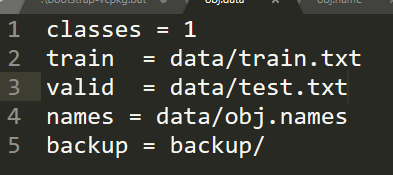<br>
classes更改成你有多少不同物件要偵測




### 第三個 yolov-obj.cfg
首先在 cfg 資料夾內找到 yolov4-custom.cfg<br>
自行下載後更改裡面需要調整的參數，把名字改成yolov-obj.cfg，然後再放到上面提到的位置<br>

以下幾點是 "**必須**" 更改的參數
1. classes <br>
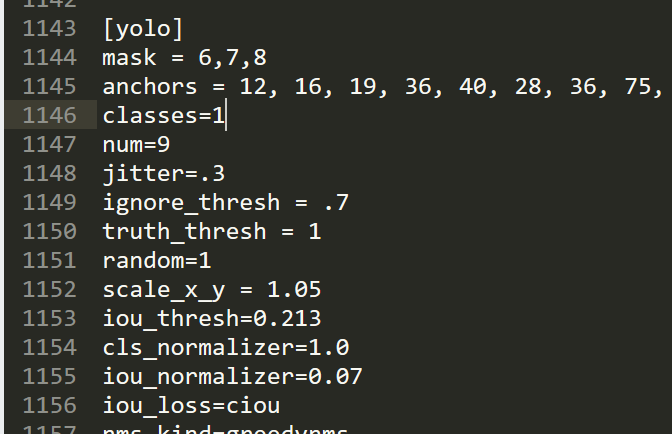<br>
不管你是使用notepad++或是sublime來編寫程式<br>
用ctrl+F搜尋 [yolo]<br>
有三點的classes 需要更改<br>
就看你要偵測幾種東西<br>
注意要改三次喔<br>
2.fliter<br>
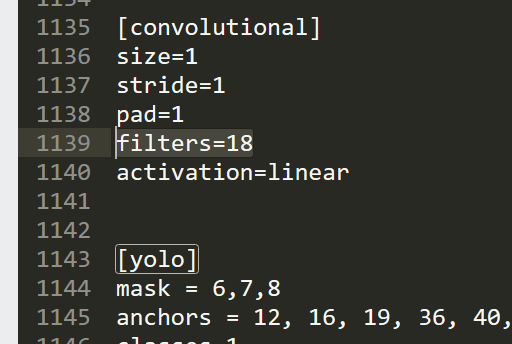<br>
沒錯! 你又看到了 [yolo] 這個東西<br>
三個[yolo]上面一層的[convolutional]需要更改其中的filter<br>
更改的公式為:<br>
filter = (classes+5)x3<br>
當然，聰明的你可能想要直接在文檔裡面打上面的公式(classes + 5)x3 <br>
但是請不要這樣做，先自己按計算機算出來然後直接填數字，不要填公式<br>
不然後面會有error<br>
注意要改三次喔<br><br>

3. max_batches and steps<br>
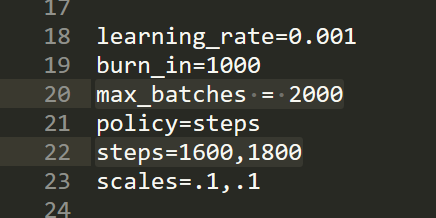<br>
max_batches = classes x 2000 (一樣請不要填公式，填數字)<br>
steps = max_batches x 0.8 , max_batches x 0.9 (一樣請不要填公式，填數字)<br>
這邊是設定跑多少次，至於為什麼會是2000次，可以去看看作者的論文github裡面有喔<br><br><br>

以下是非必要調整參數，不過還是建議調整<br>
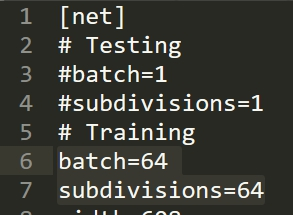<br>
batch=64 <br>
subdivisions = 32 or 64 (原始值為16，但是colab的GPU Ram沒那麼多，訓練會顯示out of memory，可以在這邊調整，如果在自己的linux上用2080ti跑可以不用改)


### 第四個yolov4.conv.137
從這裡下載再放到上面提到的位置，就這樣<br>
https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### step2 補充
在obj.data裡面你看到有個東西叫做train.txt，這邊有個程式碼可以生成train.txt，把他弄成py檔案，命名為generate_trian.py，放在 darknet下

```
import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")
```



## step3 可以開始跑程式囉~

In [ ]:
# 修改makefile 将OpenCV和GPU設定為可用
# 這個時候你應該在第一層darknet資料夾, 可以用os.chdir()進行資料夾移動
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

跑完 make 你的雲端應該會出現沒有副檔名的darknet

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

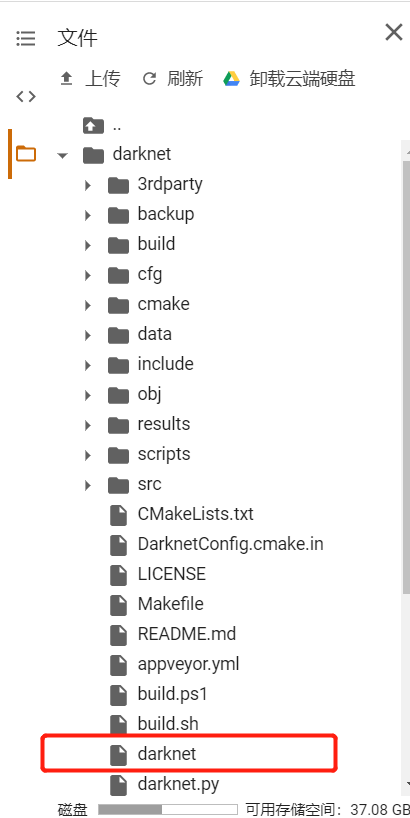

生成一份train.txt (先確定你的訓練資料已經放好了)

In [ ]:
!python generate_train.py

調整剛剛生成darknet的權限<br>
不然會出現 /bin/bash: ./darknet: Permission denied

In [10]:
!chmod 777 darknet

再來一切準備完成，你可以開始訓練了!!<br>
後面的 -dont_show 是因為colab不能彈視窗出來，所以設定don't show

In [ ]:
!./darknet detector train data/obj.data yolov-obj.cfg yolov4.conv.137 -dont_show -map

串流輸出內容已截斷至最後 5000 行。
 total_bbox = 14636, rewritten_bbox = 0.095655 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.462921, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 1825.580933, iou_loss = 0.000000, total_loss = 1825.580933 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.505303, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 544.551025, iou_loss = 0.000000, total_loss = 544.551025 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.313427, GIOU: 0.220848), Class: 0.559144, Obj: 0.536171, No Obj: 0.436011, .5R: 0.000000, .75R: 0.000000, count: 3, class_loss = 104.806099, iou_loss = 0.048470, total_loss = 104.854568 
 total_bbox = 14639, rewritten_bbox = 0.095635 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.000000, GIOU: 0.000000), Cla

由於沒有付費的colab會大概12小左右斷一次你的訓練<br>
就算你付費了，官方說不會斷你的程式，其實還是會偶爾不知道為什麼被中斷<br>
如果你的訓練不小心被中斷了，請用下面的指令從上次斷掉的地方繼續訓練

In [ ]:
!./darknet detector train data/obj.data yolov-obj.cfg backup/yolov-obj_last.weights -dont_show

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.935335, GIOU: 0.935078), Class: 0.999337, Obj: 0.514346, No Obj: 0.000846, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.236258, iou_loss = 2.530465, total_loss = 2.766723 
 total_bbox = 17487, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000097, iou_loss = 0.000000, total_loss = 0.000097 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .7

如果上面一切順利<br>
恭喜你! 你會在"backup"資料夾內看到下面圖片的那些檔案<br>
之後我們會用到yolov-obj_final.weights那個檔案，請好好保留下來<br>
那個就是你訓練好的模組<br>
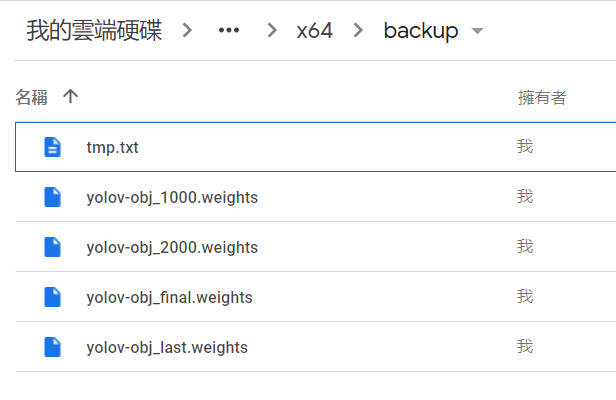

# 三、如何使用剛剛 train 好的模型(以影片為例子)

## 上傳一個你想要偵測的影片
注意現在的資料夾位置! 要在darknet下喔<br>
如果嫌colab上傳很慢可以自己開雲端放，因為我真的覺得很慢




In [ ]:
from google.colab import files
uploaded = files.upload()

## 依照下面格式輸入，自己做更改<br>
!./darknet detector demo [你的obj.data位置] [你的yolov-obj.cfg位置] [你要調用的weights檔案位置] -dont_show [剛剛上傳的影片檔名] -i 0 -out_filename [輸出檔名]

In [ ]:
!./darknet detector demo data/obj.data yolov-obj.cfg backup/yolov-obj_final.weights -dont_show rain.mp4 -i 0 -out_filename result_rain.avi

串流輸出內容已截斷至最後 5000 行。
FPS:64.4 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 70% 
Pedestrian_Crossing: 40% 

FPS:64.6 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 66% 
Pedestrian_Crossing: 35% 

FPS:63.9 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 58% 
Pedestrian_Crossing: 43% 

FPS:62.7 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 52% 
Pedestrian_Crossing: 34% 

FPS:63.2 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 52% 
Pedestrian_Crossing: 29% 

FPS:60.7 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 57% 

FPS:61.4 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 66% 

FPS:60.3 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 74% 

FPS:61.1 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 75% 
Pedestrian_Crossing: 25% 

FPS:60.7 	 AVG_FPS:58.9

 cvWriteFrame 
Objects:

Pedestrian_Crossing: 80% 
Pedestrian_Crossing: 28% 

FPS:60.9 	 AVG_FPS:58.9

 c

## 再來你就可以把剛剛的結果下載下來了<br>
當然你也可以直接去雲端看

In [ ]:
download = files.download('result.avi')

In [ ]:
#看GPU Tesla P100
!nvidia-smi

Sun Aug 23 21:06:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 四、獲取mAP值

## 製作test資料
與上面的train資料及作法相似<br>
請把資料放在 darknet/data/test (第一次要自己創建test資料夾)<br>
一樣是一個jpg配一個txt檔案<br>




將下列程式碼命名成 generate_test.py 放在darknet底下
```
import os
 
image_files = []
os.chdir(os.path.join("data", "test"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/test/" + filename)
os.chdir("..")
with open("test.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")
```



用上面的程式碼製作test.txt檔案

In [ ]:
!python generate_test.py

## 執行darknet獲取mAp值


調整 darknet 權限<br>
如果前面調整過可以忽略

In [ ]:
!chmod 777 darknet

格式為：<br>
!./darknet detector map [obj.data位置] [yolov-obj.cfg位置] [weights模組位置] -iou_thresh [你想要的iou閥值]

In [ ]:
!./darknet detector map data/obj.data yolov-obj.cfg backup/yolov-obj_final.weights -iou_thresh 0.5

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x 

順利的話你就換看到這樣的訊息<br>
像這邊就是 89.97% <br>
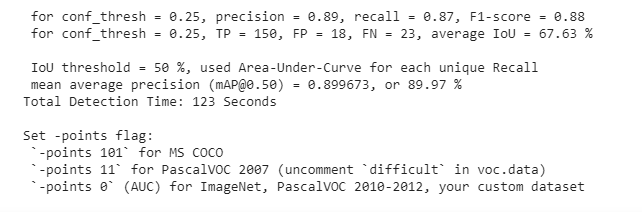

# 五、自定義輸出內容

## 施工中
https://zhuanlan.zhihu.com/p/102628373<br>
https://github.com/SoloSynth1/tensorflow-yolov4

**初始步驟**
先使用1_labels_to_yolo_format.py將xml改成yolo格式
在使用2_split_train_test.py產生train.txt以及test.txt檔案
*************
1. C:\Yolo_v4\darknet\build\darknet\x64\data修改data/config.data
2. C:\Yolo_v4\darknet\build\darknet\x64\data修改data/config.names
3. C:\Yolo_v4\darknet\build\darknet\x64\cfg修改cfg/yolov4-custom.cfg
	文件上搜尋yolo，把yolo上一層的filters以及yolo的class改掉
	max_batches = 種類數*2000
	filters = 3*(class + 5)
	batch = 64
	sub通常設8的倍數
			     ★ 这儿batch与机器学习中的batch有少许差别，仅表示网络积累多少个样本后进行一次BP 
          		     ★ 这个参数表示将一个batch的图片分sub次完成网络的前向传播
                             ★★ 敲黑板：在Darknet中，batch和sub是结合使用的，例如这儿的batch=64，sub=16表示训练的过
                             程中将一次性加载64张图片进内存，然后分16次完成前向传播，意思是每次4张，前向传播的循环过程中
                             累加loss求平均，待64张图片都完成前向传播后，再一次性后传更新参数
                             ★★★ 调参经验：sub一般设置16，不能太大或太小，且为8的倍数，其实也没啥硬性规定，看着舒服就好
                             batch的值可以根据显存占用情况动态调整，一次性加减sub大小即可，通常情况下batch越大越好，还需
                             注意一点，在测试的时候batch和sub都设置为1，避免发生神秘错误！
4. 分離訓練集與測試集 python Process.py
5. 修改Anchor ./darknet.exe detector calc_anchors data/config.data -num_of_clusters 9 -width 608 -height 608
	改完後把Anchor的結果複製下來，然後去yolov4-custom.cfg的文件下，去搜尋anchors，要改三次！
6. 訓練 ./darknet.exe detector train data/config.data cfg/yolov4-custom.cfg weights/yolov4.conv.137 -map
7.
 darknet.exe detector map data/config.data cfg/yolov4-custom.cfg backup/triangle/yolov4-custom_last.weights
 darknet.exe detector test data/config.data cfg/yolov4-custom.cfg backup/triangle/yolov4-custom_last.weights
 python darknet_video.py --input data/DJI_0001.mp4 --weights backup/triangle/yolov4-custom_last.weights --config_file cfg/yolov4-custom.cfg --data_file data/config.data --out_filename output.avi

In [ ]:
!git clone https://github.com/SoloSynth1/tensorflow-yolov4.git
https://github.com/miemie2013/Keras-YOLOv4

Cloning into 'Keras-YOLOv4'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 440 (delta 31), reused 33 (delta 14), pack-reused 388
Receiving objects: 100% (440/440), 22.67 MiB | 7.89 MiB/s, done.
Resolving deltas: 100% (222/222), done.


In [9]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 608 -height 608

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 608, height = 608 
 read labels from 700 images 
 loaded 	 image: 700 	 box: 937
 all loaded. 

 calculating k-means++ ...

 iterations = 35 


counters_per_class = 937

 avg IoU = 71.62 % 

Saving anchors to the file: anchors.txt 
anchors =  95,  7, 130, 13, 258, 11, 230, 22, 393, 20, 306, 44, 566, 39, 416, 70, 540,110



In [6]:
!chmod 777 darknet

In [ ]:
import os
os.chdir('drive')
os.chdir('My Drive')
os.chdir('darknet')

In [8]:
!ls

3rdparty		darknet_video.py       obj
backup			data		       __pycache__
backup-608		generate_test.py       rain.mp4
build			generate_train.py      README.md
build.ps1		image_yolov3.sh        result.avi
build.sh		image_yolov4.sh        result_rain.avi
cfg			IMG_1635.MOV	       results
chart.png		include		       scripts
chart_yolov-obj.png	json_mjpeg_streams.sh  src
cmake			libdarknet.a	       video_yolov3.sh
CMakeLists.txt		libdarknet.so	       video_yolov4.sh
darknet			LICENSE		       yolov4.conv.137
DarknetConfig.cmake.in	Makefile	       yolov-obj.cfg
darknet_images.py	net_cam_v3.sh
darknet.py		net_cam_v4.sh


In [ ]:
!ls